In [1]:
from math import sin
from matplotlib import mlab
import matplotlib.pyplot as pplt
import numpy as np

start = 0.0
end = 10.23
step = 0.01

In [2]:
def FFT(x, m = 1):
    x = np.asarray(x)
    N = len(x)
    if N == 1:
        return x
    evens = FFT(x[0::2], m)
    odds = FFT(x[1::2], m)
    exponents = np.exp(-2j * m * np.pi * np.arange(N) / N)
    return np.concatenate(
      [
        evens + exponents[ : N / 2] * odds,
        evens + exponents[N / 2 : ] * odds
      ]
    )

def ReverseFFT(x):
    x = FFT(x, -1)
    return 1.0 / len(x) * x

In [3]:
def drawDirect(graph):
    pplt.xlabel('x')
    pplt.ylabel('f')
    pplt.plot(mlab.frange(start, end, step), map(graph, mlab.frange(start, end, step)))
    pplt.show()

def drawReverse(graph):
    pplt.xlabel('x')
    pplt.ylabel('reverse f')
    pplt.plot(mlab.frange(start, end, step), ReverseFFT(FFT(map(graph, mlab.frange(start, end, step)))))
    pplt.show()

def drawCropped(graph, proportionOfCropped):
    tempFrange =  mlab.frange(start, end, step)
    fft = FFT(map(graph, tempFrange))
    for i in range(int((1 - proportionOfCropped) * len(fft)), len(fft)):
        fft[i] = 0
    pplt.xlabel('x')
    pplt.ylabel('from f cut off the last ' + str(proportionOfCropped * 100) + '% members')
    pplt.plot(tempFrange, ReverseFFT(fft))
    pplt.show()

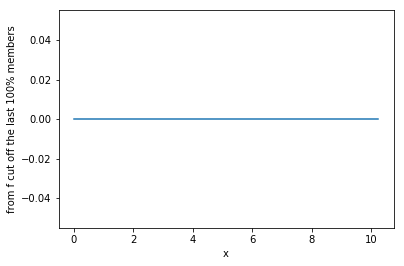

In [7]:
f = lambda x : x
drawDirect(f)
drawReverse(f)
drawCropped(f, 1)

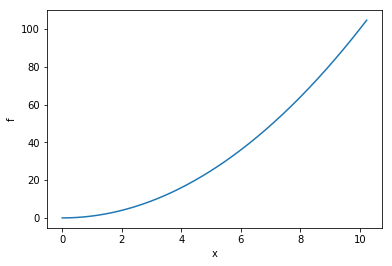

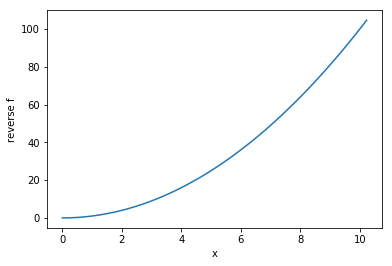

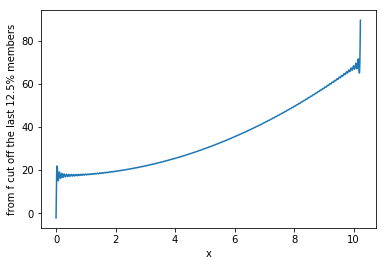

In [6]:
f = lambda x : x ** 2
drawDirect(f)
drawReverse(f)
drawCropped(f, 0.125)

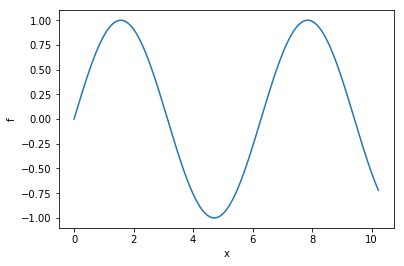

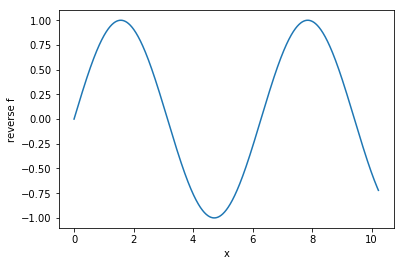

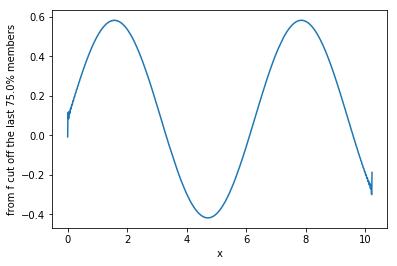

In [5]:
f = lambda x : sin(x)
drawDirect(f)
drawReverse(f)
drawCropped(f, 0.75)

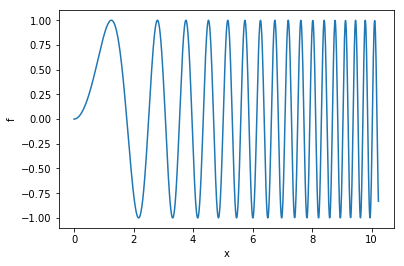

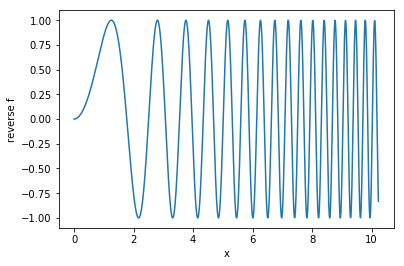

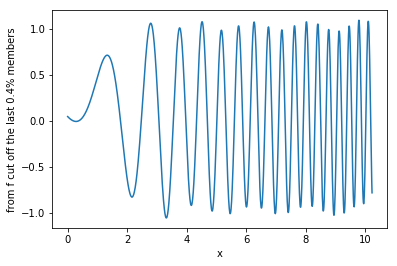

In [44]:
f = lambda x : sin(x ** 2)
drawDirect(f)
drawReverse(f)
drawCropped(f, 0.96875)

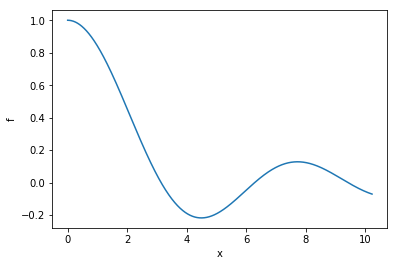

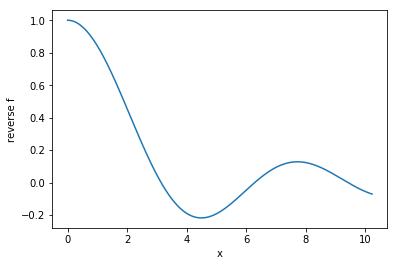

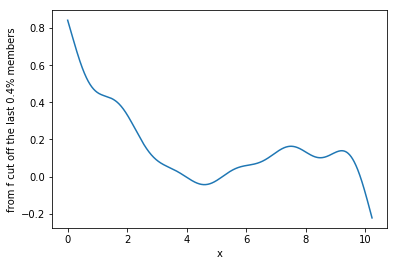

In [45]:
f = lambda x : ((lambda x : sin(x) / x)(x) if x > 0 else 1)
drawDirect(f)
drawReverse(f)
drawCropped(f, 0.96875)